In [60]:
import numpy as np

ids = np.load("recipe_ids.dat")
print(len(ids.T))
dist_mat = np.load("ingre_dist_matrix.dat")
dist_mat = dist_mat + dist_mat.T - np.diag(dist_mat.diagonal())

dist_mat.shape

373


(373, 373)

In [61]:
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

In [62]:
#make 2d embedding
mds2 = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, dissimilarity="precomputed", n_jobs=4)
embed2d = mds2.fit(dist_mat).embedding_ #xy-coordinates converted from distance matrix

In [63]:
#Setup plots
fig = plt.figure(figsize=(50,15))

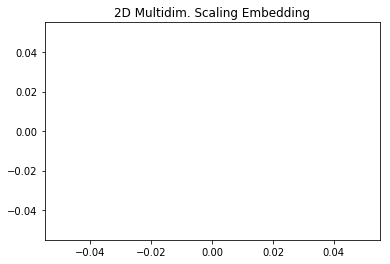

In [65]:
# plot 2d embedding
subpl2 = fig.add_subplot(133)
subpl2.set_autoscaley_on(False)
subpl2.scatter(embed2d[:, 0], embed2d[:, 1], s=20)
plt.title('2D Multidim. Scaling Embedding')
plt.axis('tight')

plt.show()

In [66]:
embed2d.shape

(373, 2)

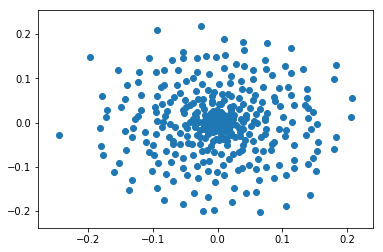

In [67]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

X = embed2d

plt.scatter(X[:,0], X[:,1])
plt.show()

In [68]:

# generate the linkage matrix
Z = linkage(X, 'ward')


from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.54916018230091246

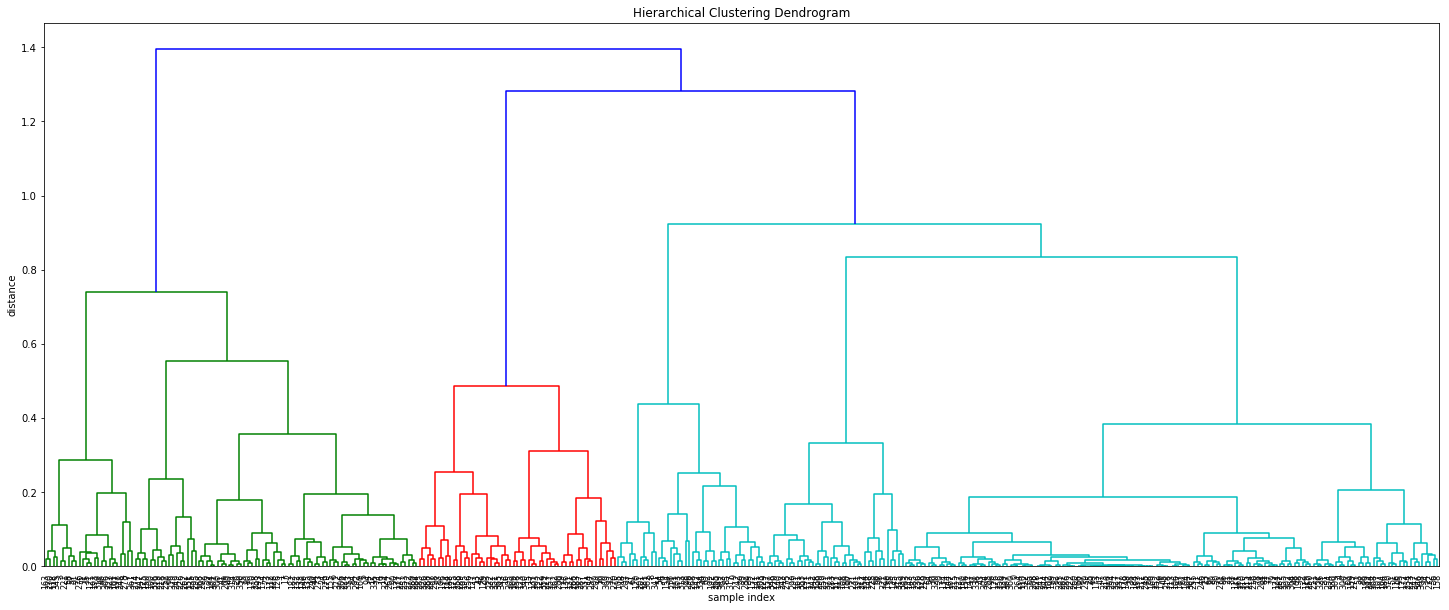

In [69]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

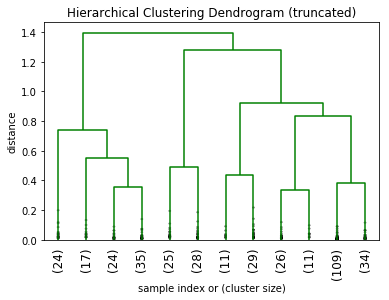

In [70]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=16,
)
plt.show()

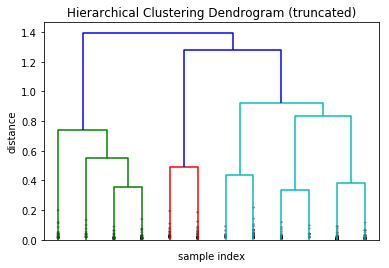

In [71]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [72]:
from scipy.cluster.hierarchy import inconsistent

depth = 5
incons = inconsistent(Z, depth)
incons[-10:]

array([[  0.05828,   0.0722 ,  31.     ,   4.12034],
       [  0.0631 ,   0.07611,  31.     ,   4.22903],
       [  0.0868 ,   0.0963 ,  24.     ,   3.63666],
       [  0.08864,   0.10431,  30.     ,   3.82356],
       [  0.09688,   0.11438,  30.     ,   3.988  ],
       [  0.13594,   0.16091,  31.     ,   3.74552],
       [  0.12646,   0.15884,  30.     ,   4.45427],
       [  0.18565,   0.21116,  31.     ,   3.49756],
       [  0.2587 ,   0.28302,  31.     ,   3.61377],
       [  0.35365,   0.34503,  31.     ,   3.02084]])

In [73]:
depth = 3
incons = inconsistent(Z, depth)
incons[-10:]

array([[ 0.156  ,  0.10204,  7.     ,  1.95758],
       [ 0.16319,  0.11118,  7.     ,  1.99486],
       [ 0.18886,  0.12838,  7.     ,  1.93295],
       [ 0.231  ,  0.13829,  7.     ,  1.85469],
       [ 0.25015,  0.15682,  7.     ,  1.93131],
       [ 0.35464,  0.21925,  7.     ,  1.75141],
       [ 0.33035,  0.23666,  7.     ,  2.12813],
       [ 0.46932,  0.29885,  7.     ,  1.52215],
       [ 0.64684,  0.37686,  7.     ,  1.68399],
       [ 0.80981,  0.41359,  7.     ,  1.41717]])

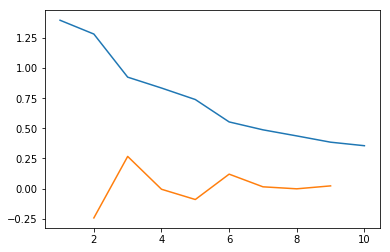

clusters: 3


In [74]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

In [75]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.6 #this is a parameter
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([6, 2, 2, 1, 6, 2, 2, 1, 4, 4, 3, 6, 2, 3, 3, 3, 3, 2, 4, 2, 6, 6, 6,
       6, 2, 6, 2, 4, 4, 3, 6, 6, 3, 6, 6, 1, 4, 6, 6, 4, 2, 2, 3, 6, 2, 6,
       1, 6, 6, 4, 6, 6, 6, 6, 4, 5, 6, 1, 1, 2, 2, 4, 6, 6, 6, 6, 5, 6, 6,
       6, 3, 1, 5, 2, 2, 2, 4, 6, 6, 6, 2, 6, 6, 3, 2, 4, 6, 6, 6, 6, 2, 1,
       4, 3, 2, 6, 6, 5, 5, 4, 2, 1, 6, 4, 6, 4, 6, 6, 5, 3, 6, 6, 2, 6, 3,
       6, 6, 5, 1, 6, 4, 1, 3, 3, 6, 2, 2, 3, 6, 3, 6, 3, 2, 2, 6, 2, 3, 3,
       5, 6, 5, 4, 4, 6, 6, 5, 2, 6, 5, 6, 2, 2, 4, 6, 4, 2, 6, 5, 6, 6, 2,
       5, 3, 1, 6, 6, 6, 6, 2, 6, 2, 5, 6, 6, 2, 3, 6, 2, 6, 6, 5, 4, 2, 3,
       6, 6, 6, 6, 3, 6, 5, 5, 4, 1, 2, 3, 3, 1, 6, 6, 3, 4, 2, 4, 6, 6, 2,
       4, 6, 3, 6, 6, 5, 6, 6, 6, 6, 3, 2, 2, 5, 1, 6, 6, 2, 5, 2, 6, 6, 4,
       1, 5, 6, 6, 6, 2, 6, 2, 2, 6, 2, 6, 4, 5, 6, 6, 6, 6, 1, 2, 6, 6, 2,
       2, 6, 6, 3, 3, 3, 5, 6, 6, 2, 6, 6, 4, 3, 2, 4, 2, 3, 6, 2, 2, 2, 5,
       1, 6, 1, 2, 2, 6, 4, 5, 2, 3, 6, 3, 3, 3, 5, 5, 2, 2, 6, 2, 4, 3, 3,
       5, 2,

In [76]:
print(len(ids.T), len(embed2d), len(clusters))

373 373 373


In [77]:
result = np.column_stack((ids.T, embed2d, clusters))

In [79]:
result.dump("ingre_clustering_result.dat")

In [80]:
# from scipy.cluster.hierarchy import fcluster
# fcluster(Z, 8, depth=10)

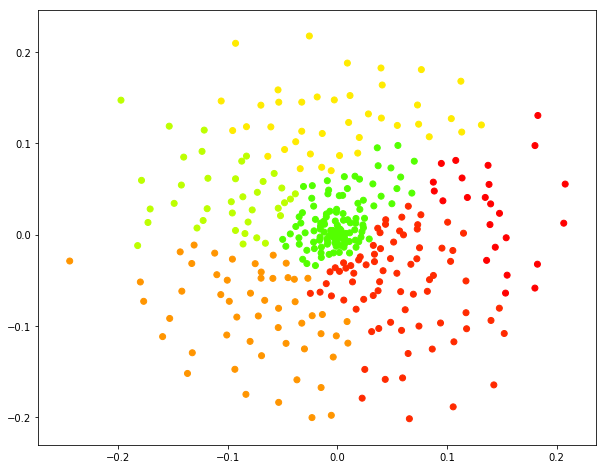

In [81]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

In [82]:
import math
def dist(x1,y1,x2,y2):
    return math.hypot(x2-x1, y2-y1)

rep_points = []
for clust in list(set(clusters)):
    points = []
    for i in result:
        if int(i.item(0,3)) == clust:
            points.append(i)
    
    x = [float(p.item(0,1)) for p in points]
    y = [float(p.item(0,2)) for p in points]
    centroid = (sum(x) / len(points), sum(y) / len(points))
    
    min_val = 99999
    min_p = points[0]
    
    for p in points:
        if dist(float(p.item(0,1)),float(p.item(0,2)), centroid[0], centroid[1]) < min_val:
            min_val = dist(float(p.item(0,1)),float(p.item(0,2)), centroid[0], centroid[1])
            min_p = p
    
    rep_points.append(min_p)

    

In [84]:
rep_points = np.array(rep_points)
rep_points.dump("ingre_rep_points.dat")